# Churn Analysis

In [0]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
from datetime import timedelta
from datetime import date
import datetime

# Data Exploration

In [0]:
users = pd.read_csv("C:\\Users\\hp\\Documents\\Mergedtables\\July 01-31.csv")
print(users)

        UserId         UserUsername  UserChatId  UserPackageType  \
0      2024657  TAWKu0oJ5d3c6puvfCR         NaN           1003.0   
1      2024681  TAiXdUFsBTIEfkGiOCR         NaN              NaN   
2      2024745  TAiyRNN22ftBTIFYsCR         NaN           1003.0   
3      2024792  TAETNzewvk9UXsOHRCR         NaN           1003.0   
4      2024803  TAQmZUmgpVpseIXWKCR         NaN           1003.0   
5      2024813  TA6Fkvr5oGjtiNyWvCR         NaN           1003.0   
6      2024842  TAeEgy2PnshXDZ16DCR         NaN           1003.0   
7      2024858  TAri0LVUzCOpqO1fnCR         NaN              NaN   
8      2024861  TAnHJxCxTwUlgoK4cCR         NaN           1003.0   
9      2024878  TAxr4YPr1Ywv1yxwnCR         NaN              NaN   
10     2024869          T3000662852         NaN           1007.0   
11     2024883  TAUMBOUskgj1aR7qwCR         NaN              NaN   
12     2024897  TAvnsmDqOpjeP668TCR         NaN           1003.0   
13     2024896  TAelY6CApe0OPtYrNCR         NaN 

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(users.dtypes)

UserId                            int64
UserUsername                     object
UserChatId                      float64
UserPackageType                 float64
UserPackageIsRecurring          float64
UserEmail                       float64
UserFacebookId                  float64
UserDeviceId                    float64
UserIsFree                        int64
UserIsActive                      int64
UserAddedDate                    object
UserLastLoginAt                  object
UserProfileUserId                 int64
UserProfileFullName              object
UserProfileFirstName            float64
UserProfileLastName             float64
UserProfileMobile               float64
UserProfileCity                 float64
UserProfileState                float64
UserProfileCountry              float64
UserProfileGender                object
UserProfileDOB                   object
UserProfileRegistrationDate      object
UserProfileUnsubsciptionDate    float64
UserProfilePlatform              object


In [0]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19706 entries, 0 to 19705
Data columns (total 48 columns):
UserId                          19706 non-null int64
UserUsername                    19706 non-null object
UserChatId                      0 non-null float64
UserPackageType                 10508 non-null float64
UserPackageIsRecurring          19577 non-null float64
UserEmail                       0 non-null float64
UserFacebookId                  0 non-null float64
UserDeviceId                    0 non-null float64
UserIsFree                      19706 non-null int64
UserIsActive                    19706 non-null int64
UserAddedDate                   19706 non-null object
UserLastLoginAt                 19706 non-null object
UserProfileUserId               19706 non-null int64
UserProfileFullName             80 non-null object
UserProfileFirstName            0 non-null float64
UserProfileLastName             0 non-null float64
UserProfileMobile               4588 non-null floa

In [0]:
users['UserPackageType'] = users['UserPackageType'].replace(np.nan, 0)

# Descriptive Analysis

In [0]:
users.describe()

,UserId,UserChatId,UserPackageType,UserPackageIsRecurring,UserEmail,UserFacebookId,UserDeviceId,UserIsFree,UserIsActive,UserProfileUserId,...,UserSubscriptionPackageId,UserPaymentUserName,UserPaymentPackageType,UserPaymentTransactionId,UserPaymentStatus,UserPaymentEndDate,UserPaymentIsRecurring,UserPaymentMobileNumber,UserPaymentMerchantID,UserPaymentOperatorID
count,1.970600e+04,0.0,19706.000000,19577.000000,0.0,0.0,0.0,19706.000000,19706.000000,1.970600e+04,...,19706.0,1.970600e+04,19706.000000,1.970600e+04,19706.000000,0.0,19706.0,4.584000e+03,0.0,19706.000000
mean,2.181064e+06,NaN,535.504922,0.534249,NaN,NaN,NaN,0.460215,0.999899,2.181064e+06,...,10.0,2.181064e+06,1004.228661,1.835687e+06,0.379123,NaN,1.0,3.168630e+09,NaN,100002.096265
std,1.043483e+05,NaN,501.028861,0.498838,NaN,NaN,NaN,0.498427,0.010074,1.043483e+05,...,0.0,1.043483e+05,1.845321,1.080008e+06,0.485181,NaN,0.0,1.346109e+08,NaN,0.434866
min,2.024583e+06,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,2.024583e+06,...,10.0,2.024583e+06,1003.000000,0.000000e+00,0.000000,NaN,1.0,3.000076e+09,NaN,100001.000000
25%,2.072687e+06,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2.072687e+06,...,10.0,2.072687e+06,1003.000000,9.436365e+05,0.000000,NaN,1.0,3.102019e+09,NaN,100002.000000
50%,2.212046e+06,NaN,1003.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,2.212046e+06,...,10.0,2.212046e+06,1003.000000,2.632174e+06,0.000000,NaN,1.0,3.133313e+09,NaN,100002.000000
75%,2.285620e+06,NaN,1003.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,2.285620e+06,...,10.0,2.285620e+06,1007.000000,2.642371e+06,1.000000,NaN,1.0,3.170865e+09,NaN,100002.000000
max,2.325766e+06,NaN,1007.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,2.325766e+06,...,10.0,2.325766e+06,1007.000000,2.652853e+06,1.000000,NaN,1.0,3.499311e+09,NaN,100003.000000


In [0]:
users.describe(include=['O'])

,UserUsername,UserAddedDate,UserLastLoginAt,UserProfileFullName,UserProfileGender,UserProfileDOB,UserProfileRegistrationDate,UserProfilePlatform,UserProfilePicture,UserProfileMobileNetwork,UserSubscriptionStartDate,UserSubscriptionExpiryDate,UserSubscriptionAddedDate,UserPaymentId,UserPaymentVersion,UserPaymentPlatform,UserPaymentStartDate,UserPaymentIP,UserPaymentMessage
count,19706,19706,19706,80,92,92,19706,19706,1,80,19706,19706,19706,19706,19706,19706,19706,19706,19706
unique,12061,11988,11959,37,4,37,11979,2,1,1,11979,12004,11988,11955,1,1,19526,2,7
top,T3151600339,2018-07-02 08:01:55,2018-07-02 10:15:34,Anonymous,Male,1984-06-25,2018-07-02 00:18:24,web,http://api.tapmad.com/pics/profilepics/img-201...,Mobilink,2018-07-02 00:18:24,2018-08-16 18:10:13,2018-07-16 18:45:30,2018-07-29 18:10:13,V1,dcb,2018-07-26 18:37:09,111.119.160.222,Transaction-Failed-Insufficient
freq,6,6,6,15,72,30,7,14443,1,80,7,6,6,6,19706,19706,3,12647,6529


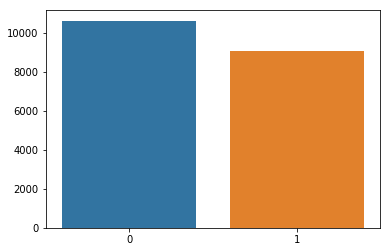

In [0]:
y = users["UserIsFree"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [0]:
print(users.groupby('UserIsFree')['UserIsFree'].count()) 


UserIsFree
0    10637
1     9069
Name: UserIsFree, dtype: int64


In [0]:
y_True = users["UserIsFree"][users["UserIsFree"] == True]
print ("UserIsFree Percentage = "+str( (y_True.shape[0] / users["UserIsFree"].shape[0]) * 100 ))

UserIsFree Percentage = 46.021516289454986


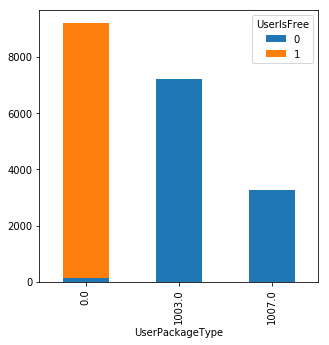

In [0]:
users.groupby(["UserPackageType", "UserIsFree"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

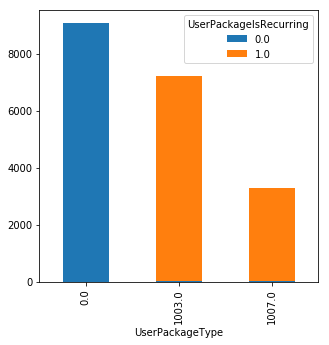

In [0]:
users.groupby(["UserPackageType", "UserPackageIsRecurring"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

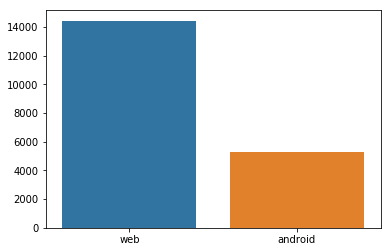

In [0]:
y_1 = users["UserProfilePlatform"].value_counts()
#print (y)
sns.barplot(y_1.index, y_1.values)

In [0]:
print(users.groupby('UserProfilePlatform')['UserProfilePlatform'].count())

UserProfilePlatform
android     5263
web        14443
Name: UserProfilePlatform, dtype: int64


# Data Cleaning
# Handle Categorical Cols - Label Encode

In [0]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
users['data'] = users['UserProfilePlatform']
values = array(users['data'])
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['web' 'web' 'web' ... 'web' 'web' 'web']
[1 1 1 ... 1 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
['web']


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


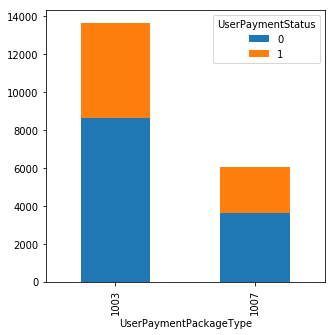

In [0]:
users.groupby(["UserPaymentPackageType", "UserPaymentStatus"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

In [0]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define ex
users["data"] = users["UserPaymentPackageType"]
values = array(users["data"])
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
users["UserPaymentPackageTypeEncoded"] = integer_encoded
users.drop("UserPaymentPackageType", inplace=True)
print(integer_encoded) 
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
users_onehot = pd.concat([users,onehot_encoded], axis=1)
users.drop("UserPaymentPackageType", inplace=True)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[1003 1003 1003 ... 1007 1007 1003]
[0 0 0 ... 1 1 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[1003]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Categorical features

In [0]:
pd.crosstab(users['UserPaymentMessage'], users['UserPaymentStatus'])

UserPaymentStatus,0,1
UserPaymentMessage,,
Recursion-Failed,3266,0
Recursion-Successful,0,2315
Recursion-Successful-FreeTrial,0,1478
Subscription-Disabled,318,0
Transaction-Failed,2122,0
Transaction-Failed-Insufficient,6529,0
Transaction-Successful,0,3678


In [0]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
users["data"] = users["UserPaymentMessage"]
values = array(users["data"])
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Transaction-Failed-Insufficient' 'Transaction-Failed-Insufficient'
 'Transaction-Failed-Insufficient' ... 'Transaction-Failed-Insufficient'
 'Transaction-Failed-Insufficient' 'Transaction-Failed-Insufficient']
[5 5 5 ... 5 5 5]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
['Transaction-Failed-Insufficient']


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


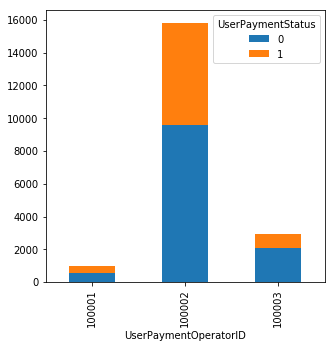

In [0]:
users.groupby(["UserPaymentOperatorID", "UserPaymentStatus"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [0]:
pd.crosstab(users['UserPaymentOperatorID'], users['UserPaymentStatus'])

UserPaymentStatus,0,1
UserPaymentOperatorID,,
100001,567,439
100002,9564,6233
100003,2104,799


# Categorical features

In [0]:
print(users.groupby('UserPaymentOperatorID')['UserPaymentOperatorID'].count()) 

UserPaymentOperatorID
100001     1006
100002    15797
100003     2903
Name: UserPaymentOperatorID, dtype: int64


In [0]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
users['operators'] = users['UserPaymentOperatorID']
values = array(users['operators'])
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[100002 100002 100002 ... 100002 100002 100002]
[1 1 1 ... 1 1 1]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[100002]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


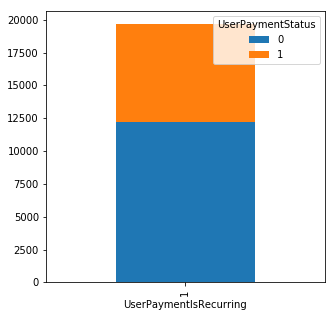

In [0]:
users.groupby(["UserPaymentIsRecurring", "UserPaymentStatus"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [0]:
print(tapmad_users.groupby('UserPaymentIsRecurring')['UserPaymentIsRecurring'].count()) 

UserPaymentIsRecurring
1    19706
Name: UserPaymentIsRecurring, dtype: int64


In [0]:
tapmad_users.UserSubscriptionExpiryDate = pd.to_datetime(tapmad_users.UserSubscriptionExpiryDate, format='%Y-%m-%d')
tapmad_users.UserSubscriptionStartDate = pd.to_datetime(tapmad_users.UserSubscriptionStartDate, format='%Y-%m-%d')
tapmad_users.UserPaymentStartDate = pd.to_datetime(tapmad_users.UserPaymentStartDate, format='%Y-%m-%d')

In [0]:
tapmad_users.UserSubscriptionExpiryDate.describe()

count                   19706
unique                  12004
top       2018-08-16 18:10:13
freq                        6
first     2018-06-30 23:57:42
last      2018-08-23 13:31:09
Name: UserSubscriptionExpiryDate, dtype: object

In [0]:
tapmad_users.UserSubscriptionStartDate.describe()

count                   19706
unique                  11979
top       2018-07-02 00:18:24
freq                        7
first     2018-07-01 00:00:34
last      2018-07-31 23:52:52
Name: UserSubscriptionStartDate, dtype: object

In [0]:
tapmad_users.UserPaymentStartDate.describe()

count                   19706
unique                  19526
top       2018-07-26 18:37:09
freq                        3
first     2018-07-01 00:05:18
last      2018-08-02 13:43:11
Name: UserPaymentStartDate, dtype: object

In [0]:
# Create target variable
start_date = pd.to_datetime('2018-07-19', format='%Y-%m-%d')
users['churn'] = users.UserSubscriptionExpiryDate.map(lambda x: x < start_date - datetime.timedelta(0,0,0))

In [0]:
users['churn'] = users['churn'].astype(int)

In [0]:
users.churn.value_counts(dropna=False)

0    14427
1     5279
Name: churn, dtype: int64